In [62]:
import pandas as pd
import csv
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

In [63]:
movie_file = Path("final_1688.csv")

movie_df = pd.read_csv(movie_file)
movie_df.head()

,title,revenue,budget,profit,main_genre,Runtime(Mins),Year,original_language,Director_O,Actors_O,Rating,Metascore_O,Rotten_Tomato_O,Award Wins,Award Nominations
0,Inception,825532764,160000000,665532764,Action,148.0,2010.0,en,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",8.8,74.0,87%,159.0,220.0
1,Interstellar,701729206,165000000,536729206,Adventure,169.0,2014.0,en,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",8.6,74.0,73%,0.0,0.0
2,The Dark Knight,1004558444,185000000,819558444,Action,152.0,2008.0,en,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart",9.0,84.0,94%,163.0,164.0
3,Avatar,2923706026,237000000,2686706026,Action,162.0,2009.0,en,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver",7.8,83.0,82%,91.0,131.0
4,The Avengers,1518815515,220000000,1298815515,Action,143.0,2012.0,en,Joss Whedon,"Robert Downey Jr., Chris Evans, Scarlett Johan...",8.0,69.0,91%,39.0,81.0


## Actor Analysis

In [64]:
Actors_df = movie_df.copy()

In [65]:
lead_actor = Actors_df[['Lead actor', 'Cast']] = Actors_df['Actors_O'].str.split(',', n=1, expand=True)

lead_actor.head()

,0,1
0,Leonardo DiCaprio,"Joseph Gordon-Levitt, Elliot Page"
1,Matthew McConaughey,"Anne Hathaway, Jessica Chastain"
2,Christian Bale,"Heath Ledger, Aaron Eckhart"
3,Sam Worthington,"Zoe Saldana, Sigourney Weaver"
4,Robert Downey Jr.,"Chris Evans, Scarlett Johansson"


In [66]:
Actors_df['Lead actor'].nunique

<bound method IndexOpsMixin.nunique of 0         Leonardo DiCaprio
1       Matthew McConaughey
2            Christian Bale
3           Sam Worthington
4         Robert Downey Jr.
               ...         
1683        Andrew Garfield
1684        Joaquin Phoenix
1685         Jerry Seinfeld
1686           Heath Ledger
1687             Mike Myers
Name: Lead actor, Length: 1688, dtype: object>

### Actors with most amounts of movies

In [67]:
number_of_unique_cast = len(pd.unique(Actors_df['Lead actor']))
number_of_unique_cast

628

In [68]:
actors_most_movies = Actors_df['Lead actor'].value_counts()

# top occuring actors

actors_most_movies.head()

Lead actor
Johnny Depp          23
Tom Hanks            22
Tom Cruise           22
Leonardo DiCaprio    19
Denzel Washington    19
Name: count, dtype: int64

In [69]:
actors_most_movies.iloc[30:40]

Lead actor
Eddie Murphy          9
Mike Myers            9
Will Ferrell          9
Tom Hardy             9
Harrison Ford         9
Ryan Reynolds         8
Scarlett Johansson    8
Robin Williams        8
Cameron Diaz          8
Joaquin Phoenix       8
Name: count, dtype: int64

In [70]:
# bins with ranges

popularity_bins = pd.cut(actors_most_movies, [0, 5, 10, 15, 20, 25], labels=['0-5', '5-10', '10-15', '15-20', '20-25'])
popularity_bins

Lead actor
Johnny Depp               20-25
Tom Hanks                 20-25
Tom Cruise                20-25
Leonardo DiCaprio         15-20
Denzel Washington         15-20
                          ...  
Steve Zahn                  0-5
Charlie Cox                 0-5
Elizabeth Olsen             0-5
Donnie Wahlberg             0-5
Philip Seymour Hoffman      0-5
Name: count, Length: 628, dtype: category
Categories (5, object): ['0-5' < '5-10' < '10-15' < '15-20' < '20-25']

In [71]:
actors_df_bins = pd.DataFrame({'Lead Actor Count': actors_most_movies, 'Popularity Bins': popularity_bins})

# Merge the 'actors df bins' with 'actors_df' on the lead actor column
Actors_merged_df = pd.merge(Actors_df,actors_df_bins, left_on='Lead actor', right_index=True)

# Group the merged DataFrame by the 'Popularity Bins' and calculate the mean box office total for each bin
mean_box_office_per_bin = Actors_merged_df.groupby('Popularity Bins')['profit'].mean()/1_000_000

print(mean_box_office_per_bin)

Popularity Bins
0-5      148.539648
5-10     211.515725
10-15    212.476724
15-20    148.936630
20-25    257.187735
Name: profit, dtype: float64


/var/folders/jd/jl0dg_qj6xg4kq6zfpwmgt840000gn/T/ipykernel_81993/478352475.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_box_office_per_bin = Actors_merged_df.groupby('Popularity Bins')['profit'].mean()/1_000_000


### analysis charts

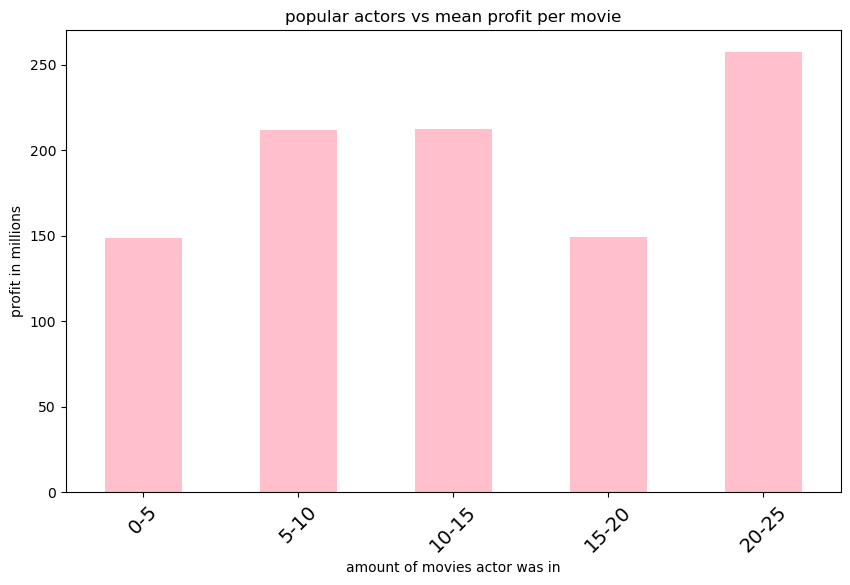

In [72]:
# popular actors vs the average profit per movie bar chart

mean_box_office_per_bin.plot(kind='bar', figsize=(10, 6), color='pink')

# Titles and labels
plt.title('popular actors vs mean profit per movie')
plt.xlabel('amount of movies actor was in')
plt.ylabel('profit in millions')
plt.xticks(fontsize=14, rotation = 45)  

plt.savefig('actor_movie_count_vs_profitpng')

plt.show()

In [ ]:
#Actors_df['Rotten_Tomato_O'] = Actors_df['Rotten_Tomato_O'].str.replace('%', '').str.replace(',', '').astype(float) / 100


# Display the DataFrame after conversion
#Actors_df.head()

In [73]:
Actors_df = pd.DataFrame({
    'Lead actor': actors_most_movies.index,
    'Movie Count': actors_most_movies.values
})

Actors_df_clean = Actors_df[['Lead actor', 'Rotten_Tomato_O']]

merged_df = pd.merge(actors_most_movies, Actors_df_clean, on='Lead actor')

# Calculate Pearson correlation
correlation, p_value = stats.pearsonr(merged_df['Movie Count'], merged_df['Rotten_Tomato_O'])
print(f"Pearson correlation coefficient: {correlation:.2f}, p-value: {p_value:.2e}")

# Create scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='Movie Count', y='Rotten_Tomato_O', data=merged_df, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.title('Lead Actor Movie Count vs Rotten Tomatoes Rating')
plt.xlabel('Number of Movies')
plt.ylabel('Rotten Tomatoes Rating')
plt.grid(True)

#plt.savefig('actor_movie_count_vs_rotten_tomatoes_rating.png')

plt.show()

KeyError: "['Rotten_Tomato_O'] not in index"

Awards Analysis